In [68]:
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [69]:
random_seed = 42

In [70]:
breast_cancer = datasets.load_breast_cancer()
df = pd.DataFrame(data=breast_cancer.data, columns=breast_cancer.feature_names)

y = df['mean area']
x = df.drop(columns=['mean area'])

df.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


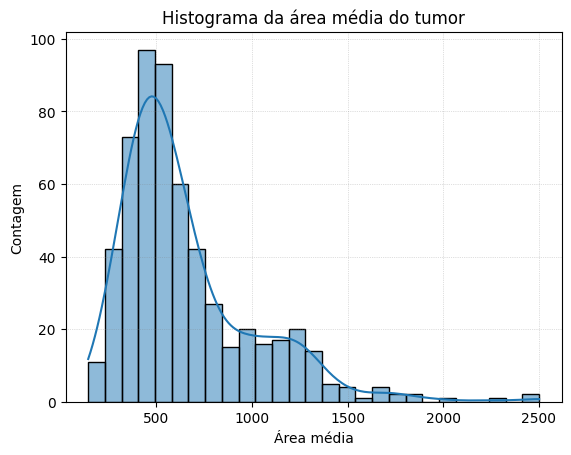

In [71]:
sns.histplot(data=df, x='mean area', kde=True)
plt.title('Histograma da área média do tumor')
plt.grid(which='both', axis='both', color='gray', linestyle=':', linewidth=0.5, alpha=0.5)
plt.xlabel('Área média')
plt.ylabel('Contagem')
plt.show()

In [72]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=random_seed)

In [73]:
regression = LinearRegression()
regression.fit(x_train, y_train)

predictions = regression.predict(x_test)

r2 = r2_score(y_test, predictions)

print('R^2:', r2)

R^2: 0.9958368973315227


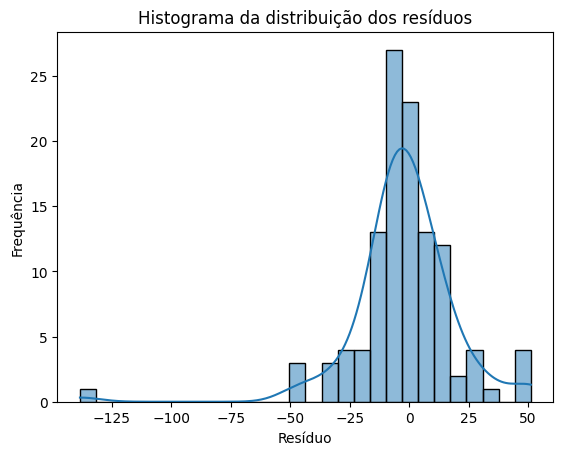

In [74]:
residuos = y_test - predictions

sns.histplot(residuos, kde=True)
plt.title('Histograma da distribuição dos resíduos')
plt.xlabel('Resíduo')
plt.ylabel('Frequência')
plt.show()